In [3]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [4]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [9]:
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [10]:
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [12]:
train_X.shape

(400, 20)

In [13]:
test_X.shape

(100, 20)

In [14]:
train_y.shape

(400,)

In [15]:
test_y.shape

(100,)

In [18]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(max_iter=1000)
clf1.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
pred_y1 = clf1.predict(test_X)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y1)

0.71

In [22]:
pred_y2 = clf2.predict(test_X)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y2)

0.7

In [25]:
from sklearn.metrics import confusion_matrix
print(clf1.classes_)
confusion_matrix(test_y, pred_y1)

[0 1]


array([[10, 21],
       [ 8, 61]])

In [26]:
from sklearn.metrics import confusion_matrix
print(clf2.classes_)
confusion_matrix(test_y, pred_y2)

[0 1]


array([[ 7, 24],
       [ 6, 63]])

In [31]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(test_y, clf1.predict_proba(test_X)[:,1])
auc(fpr1, tpr1)

0.6390836839644694

In [33]:
from sklearn.metrics import roc_curve, auc
fpr2, tpr2, threshold2 = roc_curve(test_y, clf2.predict_proba(test_X)[:,1])
auc(fpr2, tpr2)

0.7531556802244039

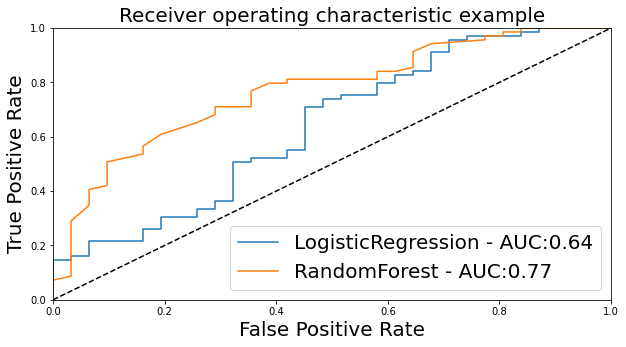

In [36]:
from sklearn.metrics import auc
from matplotlib import pyplot as plt

plt.figure(figsize= [10,5])

for clf, title in zip([clf1,clf2], ['LogisticRegression', 'RandomForest']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  #plt.plot(fpr, tpr, label='%s'%(title) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Feature Selection

In [37]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [39]:
df.head()

,bachelor,gender,age,salary,purchased
0,1,0,23,1500,0
1,1,0,30,2500,1
2,1,0,32,1800,1
3,1,0,25,1700,0
4,1,0,27,1200,0


In [40]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]

In [41]:
X.head()

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200


In [42]:
sel = VarianceThreshold()

In [43]:
X_val = sel.fit_transform(X)

In [46]:
X_val[0:3,:]

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800]])

In [47]:
sel.get_support()

array([False,  True,  True,  True])

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['bachelor','gender', 'age', 'salary']]
y = df['purchased'].values

In [49]:
clf = SelectKBest(chi2, k=2)

In [50]:
clf.fit(X,y)
print(clf.scores_)

[   0.            0.            4.48447205 2766.66666667]


In [52]:
X_new = clf.fit_transform(X,y)
X_new

array([[  23, 1500],
       [  30, 2500],
       [  32, 1800],
       [  25, 1700],
       [  27, 1200],
       [  26, 1000],
       [  35, 3500],
       [  23, 2000],
       [  22, 1800],
       [  21, 1700],
       [  38, 5000],
       [  20, 1200]])

In [72]:
from sklearn.feature_selection import VarianceThreshold
X = df[['bachelor','gender', 'age', 'salary']]
sel = VarianceThreshold()
X_val = sel.fit_transform(X)
sel.get_support()
names = X.loc[:,sel.get_support()].columns 
names
#names = df.columns[sel.get_support()]

Index(['gender', 'age', 'salary'], dtype='object')

In [73]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=1)

rfe.fit(X_val,y)



RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=1, step=1, verbose=0)

In [74]:
for x in rfe.ranking_:
    print(names[x-1], rfe.ranking_[x-1])

salary 1
age 2
gender 3


In [75]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=2)

rfe.fit(X_val,y)

RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=2, step=1, verbose=0)

In [77]:
rfe.ranking_

array([2, 1, 1])

In [79]:
from sklearn.feature_selection import RFECV
selector = RFECV(clf, step=1, cv=5)

In [83]:
selector.fit(X_val,y)

RFECV(cv=5,
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [84]:
selector.get_support()

array([False, False,  True])

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,random_state=123)

In [86]:
clf.fit(X_val, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [87]:
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
  print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


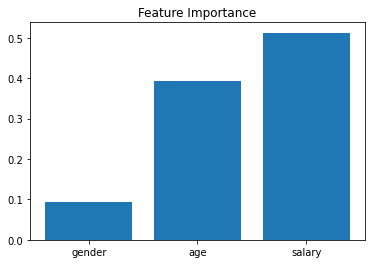

In [88]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), clf.feature_importances_)
plt.xticks(range(0,len(names)), names)
plt.show()

## Feature Extraction

In [90]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [91]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [93]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [95]:
X_reduced[0:3]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943]])

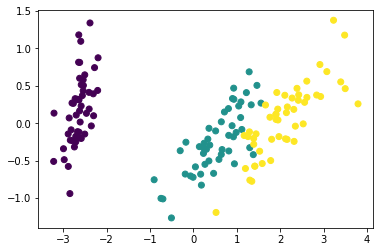

In [97]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target)
plt.show()

In [98]:
for component in pca.components_:
  print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names))) 

0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


In [99]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_reduced[:,[0]], iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
pred_y = clf.predict(X_reduced[:,[0]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, pred_y)

0.94

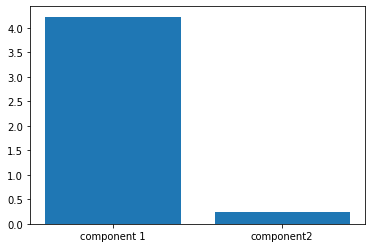

In [104]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

In [105]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [106]:
X.shape

(150, 4)

In [107]:
from scipy.linalg import svd

U, S, V = svd(X, full_matrices=False)

U.shape, S.shape, V.shape


((150, 4), (4,), (4, 4))

In [108]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [109]:
U[0:3]

array([[-0.06161685,  0.12961144,  0.0021386 ,  0.00163819],
       [-0.05807094,  0.11101978,  0.07067239,  0.05175696],
       [-0.05676305,  0.11796647,  0.00434255,  0.00955702]])

In [110]:
S[0:3]

array([95.95991387, 17.76103366,  3.46093093])

In [111]:
V[:3]

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625]])

In [113]:
import numpy as np
X2 = np.dot(np.dot(U,np.diag(S)),V)

In [114]:
X2[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [116]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [117]:
  150 * 4

600

In [118]:
150 * 4 + 4 * 4 + 4* 4

632

In [119]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
X = svd.fit_transform(iris.data)

In [120]:
X.shape

(150, 2)

In [121]:
150 * 2

300

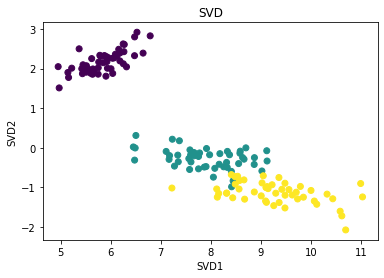

In [122]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=iris.target)
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title('SVD')
plt.show()

## Lending Club
- https://drive.google.com/open?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

In [123]:
! gdown https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo

Downloading...
From: https://drive.google.com/uc?id=1sf5jtUA7UKc56DufVZO8QW0HteOd_Swo
To: /content/LoanStats3b.csv.zip
36.6MB [00:00, 100MB/s] 


In [124]:
! unzip LoanStats3b.csv.zip

Archive:  LoanStats3b.csv.zip
  inflating: LoanStats3b.csv         


### 讀取資料

In [156]:
import pandas as pd
dataset = pd.read_csv('LoanStats3b.csv', skiprows=[0])
dataset.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47,123,124,125,128,129,130,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188183 entries, 0 to 188182
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB


In [157]:
len(dataset.columns)

145

### 資料預處理

In [158]:
dataset.isna().sum()

id                       188181
member_id                188183
loan_amnt                     2
funded_amnt                   2
funded_amnt_inv               2
                          ...  
settlement_status        186132
settlement_date          186132
settlement_amount        186132
settlement_percentage    186132
settlement_term          186132
Length: 145, dtype: int64

In [159]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan], dtype=object)

In [160]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,Systems Engineer,3 years,MORTGAGE,96500.0,Not Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > Bought a new ho...,debt_consolidation,Debt Consolidation and Credit Transfer,782xx,TX,12.61,0.0,Sep-2003,0.0,NaN,NaN,17.0,0.0,13248.0,55.7%,30.0,f,0.0,0.0,13397.539998,13397.54,...,0.0,0.0,233004.0,46738.0,14800.0,53404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,Team Leadern Customer Ops & Systems,10+ years,OWN,55000.0,Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,Debt Consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,NaN,NaN,14.0,0.0,36638.0,61.2%,27.0,w,0.0,0.0,31752.530000,31752.53,...,0.0,0.0,138554.0,70186.0,35700.0,33054.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,LTC,10+ years,MORTGAGE,130000.0,Source Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,809xx,CO,13.03,0.0,Nov-1997,1.0,NaN,NaN,9.0,0.0,10805.0,67%,19.0,f,0.0,0.0,14346.479050,14346.48,...,0.0,0.0,365874.0,44327.0,10700.0,57674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,Area Sales Manager,5 years,MORTGAGE,325000.0,Source Verified,Dec-2013,Fully Paid,n,NaN,NaN,debt_consolidation,Pay off other Installment loan,945xx,CA,18.55,0.0,Nov-1994,1.0,NaN,NaN,15.0,0.0,29581.0,54.6%,31.0,w,0.0,0.0,29150.980000,29150.98,...,0.0,0.0,850886.0,199739.0,42200.0,196686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,Project Manager,4 years,RENT,60000.0,Not Verified,Dec-2013,Fully Paid,n,NaN,Borrower added on 12/31/13 > I would like to...,debt_consolidation,No Regrets,281xx,NC,4.62,0.0,Dec-2009,1.0,NaN,NaN,15.0,0.0,7137.0,24%,18.0,f,0.0,0.0,13988.609996,13988.61,...,0.0,0.0,29700.0,7137.0,18100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
np.where((dataset.isna().sum() / len(dataset)) > 0.9)

(array([  0,   1,  18,  29,  47,  53,  54,  55,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  71,  72,  73, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 139, 140, 141, 142, 143,
        144]),)

In [162]:
dataset = dataset.iloc[:,2:111]
empty_cols = [i for i in range(45,72)]
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)

In [163]:
#dataset.info()

In [164]:
np.where((dataset.isna().sum() / len(dataset)) > 0.9)

(array([16, 27]),)

In [165]:
dataset = dataset[dataset['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [166]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
                                   ...  
revol_bal                              0
pub_rec                                0
open_acc                               0
inq_last_6mths                         0
loan_amnt                              0
Length: 82, dtype: int64

In [167]:
del_col_names = ["delinq_2yrs", "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title",
"term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line",
"initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m",
"num_accts_ever_120_pd", "delinq_amnt",
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"]

In [168]:
dataset = dataset.drop(labels = del_col_names, axis = 1)

In [169]:
dataset.isna().sum().sort_values(ascending= False)

url                               188171
mths_since_last_record            170698
mths_since_recent_bc_dlq          151423
mths_since_recent_revol_delinq    133728
mths_since_last_delinq            107568
desc                              106697
mo_sin_old_il_acct                 33872
pct_tl_nvr_dlq                     27894
mths_since_recent_inq              27867
avg_cur_bal                        27747
mo_sin_old_rev_tl_op               27742
mo_sin_rcnt_rev_tl_op              27742
mo_sin_rcnt_tl                     27741
num_actv_bc_tl                     27741
num_actv_rev_tl                    27741
total_il_high_credit_limit         27741
num_bc_tl                          27741
num_il_tl                          27741
num_op_rev_tl                      27741
num_rev_accts                      27741
num_rev_tl_bal_gt_0                27741
num_tl_op_past_12m                 27741
tot_hi_cred_lim                    27741
num_sats                           16055
num_bc_sats     

In [170]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] #'sub_grade' #selecting final features #'addr_state''tax_liens',
Final_data = dataset[features]

In [171]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,Fully Paid
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,Fully Paid
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,Fully Paid
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,Fully Paid
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,Fully Paid


In [172]:
Final_data.isna().sum()

funded_amnt                  0
emp_length                7887
annual_inc                   0
home_ownership               0
grade                        0
last_pymnt_amnt              0
mort_acc                  7495
pub_rec                      0
int_rate                     0
open_acc                     0
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                   9112
bc_open_to_buy            9025
avg_cur_bal              27747
acc_open_past_24mths      7495
loan_status                  0
dtype: int64

In [173]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             180284 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  object 
 4   grade                  188171 non-null  object 
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  object 
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [174]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade,int_rate,loan_status
0,3 years,MORTGAGE,A,7.62%,Fully Paid
1,10+ years,OWN,B,10.99%,Fully Paid
2,10+ years,MORTGAGE,B,11.99%,Fully Paid
3,5 years,MORTGAGE,A,7.62%,Fully Paid
4,4 years,RENT,B,10.99%,Fully Paid


In [175]:
Final_data["loan_status"] = Final_data["loan_status"].replace({"Fully Paid":0, "Charged Off":1}  )
Final_data["loan_status"] = Final_data["loan_status"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188171 entries, 0 to 188180
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   funded_amnt            188171 non-null  float64
 1   emp_length             180284 non-null  object 
 2   annual_inc             188171 non-null  float64
 3   home_ownership         188171 non-null  object 
 4   grade                  188171 non-null  object 
 5   last_pymnt_amnt        188171 non-null  float64
 6   mort_acc               180676 non-null  float64
 7   pub_rec                188171 non-null  float64
 8   int_rate               188171 non-null  object 
 9   open_acc               188171 non-null  float64
 10  num_actv_rev_tl        160430 non-null  float64
 11  mo_sin_rcnt_rev_tl_op  160429 non-null  float64
 12  mo_sin_old_rev_tl_op   160429 non-null  float64
 13  bc_util                179059 non-null  float64
 14  bc_open_to_buy         179146 non-nu

In [177]:
Final_data.select_dtypes('object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [178]:
Final_data["int_rate"] = Final_data["int_rate"].map(lambda e: float(e.replace('%','')) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data["emp_length"] = Final_data["emp_length"].map(lambda x:int(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [180]:
Final_data.select_dtypes('object').head()

,home_ownership,grade
0,MORTGAGE,A
1,OWN,B
2,MORTGAGE,B
3,MORTGAGE,A
4,RENT,B


In [181]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
Final_data["home_ownership"] =  Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
Final_data.head(3)

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0


In [185]:
Final_data.isna().sum().sort_values(ascending = False)

avg_cur_bal              27747
mo_sin_old_rev_tl_op     27742
mo_sin_rcnt_rev_tl_op    27742
num_actv_rev_tl          27741
bc_util                   9112
bc_open_to_buy            9025
acc_open_past_24mths      7495
mort_acc                  7495
loan_status                  0
grade                        0
emp_length                   0
annual_inc                   0
home_ownership               0
int_rate                     0
last_pymnt_amnt              0
pub_rec                      0
open_acc                     0
funded_amnt                  0
dtype: int64

In [186]:
Final_data.fillna(Final_data.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [187]:
Final_data.isna().sum().sort_values(ascending = False)

loan_status              0
acc_open_past_24mths     0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
funded_amnt              0
dtype: int64

### 資料重取樣(Bootstrap)

In [188]:
Final_data['loan_status'].value_counts()

0    158503
1     29668
Name: loan_status, dtype: int64

In [191]:
loanstatus_0 = Final_data[Final_data['loan_status'] ==0].sample(n=5500)
loanstatus_1 = Final_data[Final_data['loan_status'] ==1].sample(n=5500)

In [192]:
data_clean = pandas.concat([loanstatus_0,loanstatus_1])

In [193]:
len(data_clean)

11000

In [194]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [195]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,20000.0,10,155000.0,6,3,557.74,4.0,0.0,22.47,22.0,13.0,4.0,327.0,94.9,735.0,22659.0,9.0,1
1,35000.0,10,130000.0,6,2,1129.48,6.0,0.0,24.50,7.0,6.0,2.0,141.0,90.5,2261.0,4707.0,1.0,1
2,16000.0,7,100000.0,6,4,590.72,2.0,0.0,19.52,11.0,4.0,3.0,182.0,71.8,2061.0,12989.0,9.0,1
3,12375.0,9,39500.0,5,4,450.44,2.0,0.0,18.49,7.0,3.0,8.0,166.0,101.8,0.0,7398.0,3.0,1
4,30225.0,2,67600.0,6,2,851.19,1.0,0.0,22.95,13.0,3.0,6.0,138.0,77.6,1454.0,16196.0,12.0,1


In [196]:
data_clean['loan_status'].value_counts()

1    5500
0    5500
Name: loan_status, dtype: int64

### 將資料區分為 X 跟 Y

In [197]:
y = data_clean.iloc[:,-1]
X = data_clean.iloc[:,:-1]

### 將資料標準化

In [198]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### 將資料區分為訓練與測試資料集

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

### 特徵篩選

In [200]:
from sklearn.feature_selection import RFE
clf_LR = LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 10)

In [202]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1e+30, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [224]:
X.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'int_rate',
       'open_acc', 'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy',
       'acc_open_past_24mths'],
      dtype='object')

In [204]:
rfe.ranking_

array([1, 5, 1, 3, 1, 1, 2, 8, 1, 1, 6, 4, 1, 1, 1, 7, 1])

### 特徵抽取

In [205]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

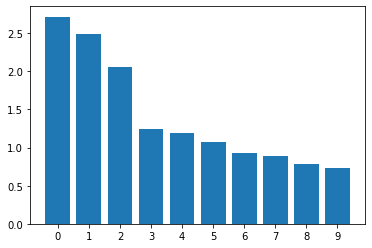

In [207]:
plt.bar(range(0,10), pca.explained_variance_)
plt.xticks(range(0,10))
plt.show()

In [231]:
X_train = X_train[:,rfe.support_]
X_test = X_test[:,rfe.support_]

### Logistic Regression  + Grid Search

In [234]:
def cross_validation_best_parameters(model, param_grid):
  grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
  X=X_train
  y=y_train
  grid.fit(X,y)
  return grid.best_score_,grid.best_estimator_

In [236]:
logreg = LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier =cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.8044318181818181
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [240]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
  fpr, tpr, _ = roc_curve(truth,pred)
  roc_auc = auc(fpr, tpr)
  lw = 2
  c = (np.random.rand(), np.random.rand(), np.random.rand())
  plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve') #Receiver Operating Characteristic
  plt.legend(loc="lower right")

In [241]:
import numpy as np

clf_LR = LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


Logistic regression accuracy is  0.7940909090909091


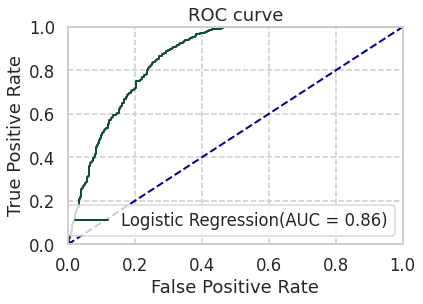

In [242]:
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

In [243]:
from sklearn.neural_network import MLPClassifier

clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf_NN.fit(X_train,y_train)
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)


0.7945454545454546


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


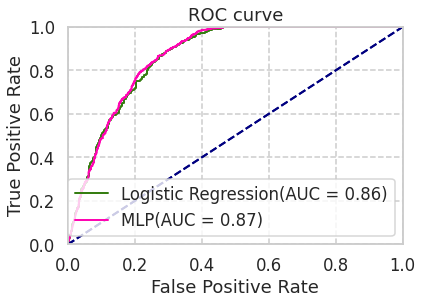

In [246]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()


In [ ]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection  import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)

maxFeatures = range(1,11)
param_dist = dict(max_features=maxFeatures)

rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=X_train
y=y_train
rand.fit(X,y)


In [253]:

from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion =
"gini",max_features=4,random_state=0 )

randomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [254]:
rfPredict = randomForest.predict(X_test)
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)

0.8004545454545454


In [258]:
from sklearn.metrics import roc_auc_score
rfPredictproba = randomForest.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,rfPredict)

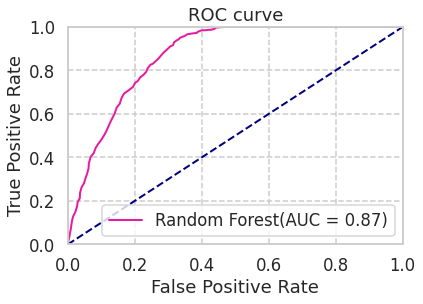

In [259]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()

In [263]:
features

['funded_amnt',
 'annual_inc',
 'grade',
 'last_pymnt_amnt',
 'int_rate',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_old_rev_tl_op',
 'bc_util',
 'bc_open_to_buy',
 'acc_open_past_24mths',
 'loan_status']

Text(0, 0.5, 'Normalized Gini Importance')

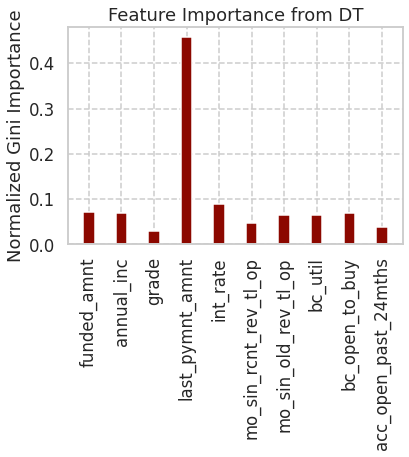

In [265]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(features[:-1],rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100
model = BaggingClassifier(base_estimator=randomForest,n_estimators=num_trees, random_state=seed)

results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())

### Boosting

In [267]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

Ada_clf = AdaBoostClassifier(n_estimators=50)

scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values)
scores.mean()

0.8038181818181818

In [268]:
from sklearn.ensemble import GradientBoostingClassifier
gda_clf = GradientBoostingClassifier(n_estimators=50)
scores = cross_val_score(gda_clf, data_clean.iloc[:,:-1].values,
data_clean.iloc[:,-1].values)
scores.mean()

0.8088181818181818

### XGBoost

In [269]:
import xgboost as xgb

In [270]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [272]:
from sklearn.datasets import dump_svmlight_file
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)

In [273]:
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[05:56:30] 8800x10 matrix with 88000 entries loaded from dtrain.svm
[05:56:30] 2200x10 matrix with 22000 entries loaded from dtest.svm


In [277]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20

In [278]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.994028  , 0.005972  ],
       [0.87344414, 0.12655593],
       [0.48408812, 0.5159119 ]], dtype=float32)

In [279]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([0, 0, 1, ..., 1, 0, 1])

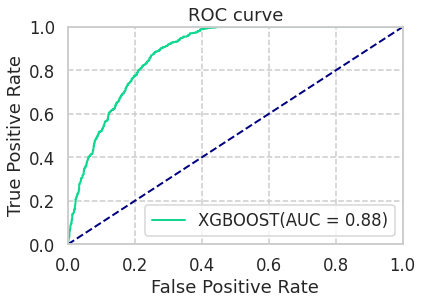

In [280]:
xgboost_predict = preds[:,1]
plotAUC(y_test,xgboost_predict,'XGBOOST')

In [283]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))
print("MLP",classification_report(y_test, predict_NN, target_names=None))
print("XGBOOST",classification_report(y_test, best_preds, target_names=None))

RF               precision    recall  f1-score   support

           0       0.88      0.70      0.78      1105
           1       0.75      0.90      0.82      1095

    accuracy                           0.80      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.81      0.80      0.80      2200

LR               precision    recall  f1-score   support

           0       0.89      0.67      0.77      1105
           1       0.74      0.92      0.82      1095

    accuracy                           0.79      2200
   macro avg       0.81      0.79      0.79      2200
weighted avg       0.81      0.79      0.79      2200

MLP               precision    recall  f1-score   support

           0       0.89      0.67      0.77      1105
           1       0.74      0.92      0.82      1095

    accuracy                           0.79      2200
   macro avg       0.81      0.80      0.79      2200
weighted avg       0.81      0.79      0.79      2200

XGBOOST  

## 文字探勘

In [284]:
a = 'this is a book'
a.split()

['this', 'is', 'a', 'book']

In [286]:
a = '''
國立台灣大學連續5天發生3起學生意外，於低迷氣氛中迎來92年校慶。今天（11/14）是校慶前夕，園遊會率先登場，校長管中閔今出席致詞並接受媒體聯訪，他表示，已針對事件當事人相關系所與群體啟動集體創傷治療，也邀請校內各學生單位探討可能的結構問題，希望從根本解決。
'''
a.split('，')

['\n國立台灣大學連續5天發生3起學生意外',
 '於低迷氣氛中迎來92年校慶。今天（11/14）是校慶前夕',
 '園遊會率先登場',
 '校長管中閔今出席致詞並接受媒體聯訪',
 '他表示',
 '已針對事件當事人相關系所與群體啟動集體創傷治療',
 '也邀請校內各學生單位探討可能的結構問題',
 '希望從根本解決。\n']

In [287]:
import re
re.split('，|。',a)

['\n國立台灣大學連續5天發生3起學生意外',
 '於低迷氣氛中迎來92年校慶',
 '今天（11/14）是校慶前夕',
 '園遊會率先登場',
 '校長管中閔今出席致詞並接受媒體聯訪',
 '他表示',
 '已針對事件當事人相關系所與群體啟動集體創傷治療',
 '也邀請校內各學生單位探討可能的結構問題',
 '希望從根本解決',
 '\n']

In [296]:
import jieba
a = '國立台灣大學連續5天發生3起學生意外'
print(list(jieba.cut(a)))

['國立', '台灣', '大學', '連續', '5', '天發生', '3', '起', '學生', '意外']


In [291]:
jieba.get_dict_file()

<_io.BufferedReader name='/usr/local/lib/python3.6/dist-packages/jieba/dict.txt'>

In [292]:
! head /usr/local/lib/python3.6/dist-packages/jieba/dict.txt

AT&T 3 nz
B超 3 n
c# 3 nz
C# 3 nz
c++ 3 nz
C++ 3 nz
T恤 4 n
A座 3 n
A股 3 n
A型 3 n


In [293]:
! touch userdict.txt

In [294]:
jieba.load_userdict('userdict.txt')

In [297]:
import jieba
a = '國立台灣大學連續5天發生3起學生意外'
print(list(jieba.cut(a)))

['國立', '台灣', '大學', '連續', '5', '天發生', '3', '起', '學生', '意外']


In [308]:
! rm -rf jieba-zh_TW
! git clone https://github.com/ldkrsi/jieba-zh_TW.git

Cloning into 'jieba-zh_TW'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320
Receiving objects: 100% (2320/2320), 44.97 MiB | 21.28 MiB/s, done.
Resolving deltas: 100% (1311/1311), done.


In [310]:
! ls jieba-zh_TW/jieba

analyse  _compat.py  dict.txt  finalseg  __init__.py  __main__.py  posseg


In [311]:
! ls /usr/local/lib/python3.6/dist-packages/jieba/

analyse     dict.txt  __init__.py  posseg
_compat.py  finalseg  __main__.py  __pycache__


In [314]:
! cp -r jieba-zh_TW/jieba/* /usr/local/lib/python3.6/dist-packages/jieba/

In [2]:
! head /usr/local/lib/python3.6/dist-packages/jieba/dict.txt

A咖 36 N
A型 3 N
A片 19 N
A級 2 N
A股 3 N
A菜 6 N
B咖 6 N
B哀 1 Vi
B型 4 N
B級 2 N


In [8]:
del jieba

In [9]:
import jieba
a = '大巨蛋案對市府同仁下封口令？ 柯P否認'
print(list(jieba.cut(a)))

['大巨蛋案', '對', '市府', '同仁', '下', '封口', '令', '？', ' ', '柯P', '否認']


In [10]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？ 柯P否認")
for w in words:
  print(w.word, w.flag)

大巨蛋案 N
對 P
市府 N
同仁 N
下 POST
封口 N
令 Vt
？ x
  x
柯P N
否認 Vt


In [11]:
a = '''中央流行疫情指揮中心今（14）日公布，國內新增3例境外移入新冠肺炎（COVID-19，又名武漢肺炎）確定病例（案599至601），分別自菲律賓、印尼及克羅埃西亞入境'''

In [15]:
import jieba.posseg as pseg
jieba.load_userdict('userdict.txt')
words = pseg.cut(a)
for w in words:
  print(w.word, w.flag)

中央 N
流行 Vi
疫情 N
指揮 Vt
中心 N
今 N
（ x
14 m
） x
日 M
公布 Vt
， x
國內 N
新增 Vt
3 m
例 v
境外 N
移入 Vt
新冠肺炎 n
（ x
COVID eng
- x
19 m
， x
又 d
名 q
武漢 N
肺炎 N
） x
確定 Vt
病例 N
（ x
案 n
599 m
至 p
601 m
） x
， x
分別 ADV
自 P
菲律賓 N
、 x
印尼 N
及 C
克羅埃西亞 N
入境 Vi


In [16]:
words = jieba.tokenize("大巨蛋案對市府同仁下封口令？ 柯P否認")
for tw in words:
  print(tw[0], tw[1], tw[2])

大巨蛋案 0 4
對 4 5
市府 5 7
同仁 7 9
下 9 10
封口 10 12
令 12 13
？ 13 14
  14 15
柯P 15 17
否認 17 19


In [17]:
! pip install ckiptagger

In [ ]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [19]:
data_utils.download_data_gdown("./") # gdrive-ckip

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:14, 130MB/s]


In [20]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

In [21]:
sentence_list = [
    '''中央流行疫情指揮中心今（14）日公布，國內新增3例境外移入新冠肺炎（COVID-19，又名武漢肺炎）確定病例（案599至601），分別自菲律賓、印尼及克羅埃西亞入境''',
]

word_sentence_list = ws(
    sentence_list,
)

pos_sentence_list = pos(word_sentence_list)

entity_sentence_list = ner(word_sentence_list, pos_sentence_list)

In [23]:
print(word_sentence_list)

[['中央', '流行', '疫情', '指揮', '中心', '今', '（14）', '日', '公布', '，', '國內', '新增', '3', '例', '境外', '移入', '新冠肺炎', '（', 'COVID-19', '，', '又', '名', '武漢', '肺炎', '）', '確定', '病例', '（', '案', '599', '至', '601', '）', '，', '分別', '自', '菲律賓', '、', '印尼', '及', '克羅埃西亞', '入境']]


In [26]:
print(pos_sentence_list)

[['Nc', 'VH', 'Na', 'VC', 'Nc', 'Nd', 'Neu', 'Nd', 'VE', 'COMMACATEGORY', 'Nc', 'VJ', 'Neu', 'Na', 'Nc', 'VC', 'Na', 'PARENTHESISCATEGORY', 'FW', 'COMMACATEGORY', 'D', 'VG', 'Nc', 'Na', 'PARENTHESISCATEGORY', 'VK', 'Na', 'PARENTHESISCATEGORY', 'Na', 'Neu', 'Caa', 'Neu', 'PARENTHESISCATEGORY', 'COMMACATEGORY', 'D', 'P', 'Nc', 'PAUSECATEGORY', 'Nc', 'Caa', 'Nc', 'VA']]


In [27]:
print(entity_sentence_list)

[{(10, 16, 'DATE', '今（14）日'), (72, 74, 'GPE', '印尼'), (75, 80, 'GPE', '克羅埃西亞'), (23, 24, 'CARDINAL', '3'), (40, 42, 'PRODUCT', '19'), (0, 10, 'ORG', '中央流行疫情指揮中心'), (68, 71, 'GPE', '菲律賓'), (56, 63, 'CARDINAL', '599至601'), (45, 47, 'GPE', '武漢')}]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
speech = '''大會主席游錫堃院長、現場各位貴賓、電視機前和網路上的全體國人同胞：大家早安，大家好！

 

一、防疫成果貢獻國際

今天是中華民國109年的國慶日，今年因為疫情，慶典的規模縮小了，但所有的國人同胞，無論身在何處，都發自內心，慶賀中華民國台灣，度過了重重挑戰的一年。

2020這一年，在新型冠狀病毒威脅下，無論對台灣或全世界，都是驚濤駭浪的一年。但是，也因為這場全球性的危機，才讓國際社會看到台灣「堅韌之島」的特質和能耐。

我們沒有封城，沒有關閉學校，也是世界上少數還能夠在管制措施下，開打職棒、舉辦大型藝文活動的國家。我們更展現了傲人的國力，將防疫物資送到世界各地。

從今年三月以來，有超過三千三百篇國際媒體報導，都在談論台灣的防疫表現。台灣在國際上的面貌，越來越清晰，比過去任何時期都更加亮眼。

這樣的成就，要歸功於全體台灣人民的團結、合作。除了最辛苦的醫護和檢疫人員，我們也要感謝，製造業攜手投入防疫物資生產，科技業開發APP，藥師朋友、超商員工協助發放口罩，還有我們所有的民眾，井然有序的配合各項防疫措施。

我們也看到，海外歸來的國人，依規定居家隔離、檢疫。旅行業者提供防疫旅館，租賃車業者提供防疫車隊，餐廳娛樂場所落實實名制規定。因為全國上下一心，我們守住了疫情的防線，讓台灣成為世界的模範生。

當日本的森喜朗前首相、捷克的韋德齊參議長、美國的阿札爾部長和柯拉克國務次卿，相繼來訪，表達他們對台灣的敬意的時候，相信許許多多的國人，都感到無比的振奮。

透過因應疫情的挑戰，我們證明了國家在逆境中的生存能力，建立了國民的自信。更重要的是，我們團結了，因為我們深刻體會到守護家園的重要。所以這一年，確實是辛苦而險峻的一年，但也是豐收的一年。

今天的大會中，邀請到各行各業的防疫英雄，來為我們領唱國歌。其中有很多我們熟悉的故事，像是賴碧蓮護理師，臉上光榮的口罩壓痕，或者是張莞爾護理師，瞞著家人出任務，陪伴血友病少年返台的感人事蹟。

還有更多無名英雄，不曾被報導，因為這一場戰役，有太多人的投入，有說不完的故事。我要請現場的好朋友，用最熱烈的掌聲，再一次給我們的防疫英雄們滿滿的感謝，謝謝他們為台灣所做的付出。

 

二、新情勢下的經濟戰略

因為疫情控制得當，台灣成為全球少數可以維持經濟正成長的國家，我們也為疫情後的經濟發展，超前部署。「六大核心戰略產業」正在積極規劃推動；前瞻基礎建設計畫，也已經分期編列特別預算，加速進行當中。

最讓我們感到振奮的，是國人及企業，對台灣經濟發展的信心更強了。台灣資本長期以來外流的趨勢，已經翻轉過來。

我們迎來幾十年來最大規模的資金回流潮，台商返台投資，已經超過新台幣一兆元，還有數以千億元計的海外資金，正在陸續匯回；許多外商及知名跨國企業，也在加碼投資台灣。這些，都是現在進行式。

在國際經貿合作的領域中，我們也有不少實質進展。台灣和美國將進行高層經濟對話，在全球供應鏈重組、科技合作、基礎建設等領域，尋求未來合作空間。

上週，台美雙方宣布，已經完成簽署「台美基礎建設融資及市場建立合作架構」，雙方將攜手投入美洲，以及印太地區的基礎建設計畫。台美經濟合作的深化，已經進入到行動階段，這也是我們在國際經貿合作上，尋求全面性突破的開始。

不過，我也要提醒國人。全球疫情還沒有結束，疫情帶給各國在經濟、社會層面的複雜挑戰，仍然很嚴峻。

展望未來，還有更艱鉅的挑戰等著我們去克服。疫情後世界經濟的復原，人類生活型態的轉變，全球以及區域貿易情勢的劇烈變化，還有經濟秩序的重整，每一項都考驗我們經濟的續航力，以及整體的應變能力。

面對數十年來最大的內、外變局，台灣會持續展現我們的韌性，政府會掌好舵，朝三個策略方向前進，打造大家所期待的新台灣經濟。

首先，我們要全力、全方位投入供應鏈的重組。現在，全球供應鏈的快速解構及重組，是一個不可逆轉的趨勢。各地台商也正在朝向區隔市場、轉移生產基地、回台投資等方向，加速調整。

我們已經在推動的「5+2產業創新」、「六大核心戰略產業」、兆元投資計畫、「新南向政策」、台美經濟合作、參與區域經濟整合等等，都和供應鏈重組息息相關。

我們會將這些相關的政策和計畫串聯起來，並且整合政府和民間的資源，以及跨部會的能量，全力、全方位的投入，讓台灣成為全球供應鏈不可或缺的關鍵力量。

第二，我們要打造台灣成為國際資本、人才及數位技術匯聚的重鎮。未來供應鏈的重組，最關鍵的元素是資本、人才，以及邁向數位經濟時代的核心技術。

我們將會在吸引國際資本跟人才的環境及法制上，持續深化改革，排除障礙。同時，也會透過國際交流、產學合作，以及雙語國家政策的努力，積極培育國內產業人才。

另外一方面，我們也會運用台灣在資通訊、半導體、物聯網、人工智慧等優勢，開發及掌握核心技術，加速推動產業及經濟的數位轉型。

第三，我們要全力落實經濟與社會的均衡發展。疫情後的經濟、產業發展，可能會有失衡的風險，資金供給大幅的增加，也可能帶來後遺症。

所以，未來政府會更加重視資源的合理分配，照顧因為經濟轉型而受衝擊的弱勢族群，加強促進青年就業，引導資金進行最有效的利用，讓台灣經濟再起的紅利，可以讓全國的人民共享。

 

三、堅實國防維護國家安全

當然，台灣經濟的前景，是有賴於區域的和平穩定。我們很清楚，示弱退讓不會帶來和平，只有自我準備充足，憑藉著堅實的防衛決心和實力，才能保障台灣的安全、維護區域的和平。

精進國防實力，降低戰爭風險，這是當前我們國防政策的原則。這段時間，面對對岸機艦騷擾，台海情勢雖然比較緊張，但是我們的國軍，都能夠即時掌握和因應，達成防衛固守的任務。

這幾年來，只要我有時間，我就會前往部隊，看看我們的國軍官兵。從高山上的空軍雷達站，到返航靠港的海軍艦隊；從在陣地操練火砲的陸軍部隊，到培養年輕軍士官的學校。

我的目的，不僅是要對這些日夜輪班、保家衛國的軍人，說一聲謝謝，也要讓我們的國人知道，國軍是我們的家人，也是國家主權、自由民主最強的後盾。

在跟國軍官兵的互動中，許多故事堅定了我的信心。我還記得，當我到第一線空軍部隊的時候，警戒室裡，隨時準備緊急出勤的飛官，充滿信心地告訴我「務必將空防交給空軍」。

我也記得，我在陸軍工訓中心，看到我們女性軍官，帶領著工兵同袍，展現出「逢山開路、遇水架橋」的氣魄。在海軍水下作業大隊，則有穿戴重裝備的弟兄姊妹，奮勇潛入海底，排除障礙。

這就是中華民國國軍。他們不分前線後勤，不分男女，都是我們的子弟，都有共同守護國家的信念。

這段時間以來，也有國軍弟兄姊妹在執行任務的過程中，為國受傷，甚至殉職。我們感念他們的付出，並且以英勇盡責的國軍為榮。

身為三軍統帥，國軍的未來、未來的國軍，就是我最心心念念的事情。

面對對岸的軍事擴張和挑釁，我們會持續強化防衛戰力的現代化，並且提升不對稱戰力。在外購武器裝備的同時，我們仍然堅持加速推動國防自主，高教機國造、潛艦國造，已經有相當的成效。我們將以雙軌並進的方式，來強化我們的防衛實力。

不僅武器裝備性能正在提升，國軍更需要有素質優秀的戰士。除了提升志願從軍的官士兵的專業素養，更要建立有效的後備制度，來強化國軍的人力素質以及戰力。

這段時間以來，相信很多被教育召集的後備軍人都覺得，教召變得更加精實。而在常後一體的原則下，接下來，後備動員制度的改革，將會快速推動。

面對區域和平穩定受到威脅，我們堅守「不畏戰，不求戰」的原則，避免擦槍走火。國防部也會適時發布共軍動態，和周邊國家交換資訊，強化安全夥伴角色；也讓國人明瞭台海動態，讓全民國防更加堅實。

 

四、積極作為參與區域合作

這段時間，我們都密切注意著區域安全情勢的變動。從南海、東海主權爭議，中印衝突，到台海局勢的變動，乃至於各國關切的港版國安法實施，印太區域的民主、和平與繁榮，正受到嚴峻的挑戰。

區域內的國家，為了確保自身安全和民主體制，不受到外在因素影響，而展開了各種形式的合縱連橫，已經導致這個區域，發生前所未有的情勢變化。

我們要把變局的試煉，轉變成歷史的機遇。我們堅持主權以及守護民主價值的原則，不會改變；但在策略上，也會保持彈性、靈活應用。

情勢在改變，只有超前部署，才能掌握未來，才不會在變局中隨波逐流，甚至被別人決定了命運。

我們將積極參與未來的國際和區域新秩序的建立。我們會秉持「價值同盟」的原則，在國際社會廣結善緣，並且跟理念相近和友我的國家，持續提升夥伴關係；我們也會更積極地參與區域及國際的多邊合作和對話。

維持和平、促進繁榮發展，這就是中華民國台灣，在區域中最重要的價值。我們要做良善力量的倡議者，將進步及良善的價值，推廣到全世界。

我也注意到，對岸領導人最近在對聯合國的視訊演說中，公開表示：中國永遠不稱霸，不擴張，不謀求勢力範圍。

在區域國家、乃至於全世界，都在擔憂中國擴張霸權的此刻，我們希望，這是一個真正改變的開始。

尤其，在全球高度關注印太及兩岸局勢變化的重要時刻，北京如果能夠正視台灣的聲音，改變處理兩岸關係的態度，和台灣共同促成兩岸的和解及和平對話，相信一定可以化解區域的緊張局勢。

面對兩岸關係，我們不會冒進，也會堅守原則。維持兩岸關係的穩定，是兩岸共同的利益；我們有決心維持兩岸的穩定，但這不是台灣可以單方面承擔的，而是雙方共同的責任。

現階段兩岸當務之急，是本於相互尊重、善意理解的態度，共同討論和平相處之道、共存之方；只要北京當局有心化解對立，改善兩岸關係，在符合對等尊嚴的原則下，我們願意共同促成有意義的對話。這就是台灣人民的主張，也是朝野政黨的共識。

 

五、結語：團結合作共度挑戰

這段時間，我們可以明顯感受，台灣人民在對外關係以及國家安全的議題上，彼此的距離正在拉近。台灣人民都希望區域的和平繁榮，能夠安定永續。

朝野政黨之間也是如此。像是最近在立法院，在野黨提出促進台美關係的議案，獲得朝野黨團的支持，無異議通過。還有，六都首長一致對外，共同抗議，成功更正了國際組織矮化台灣的做法。這些都是跨黨派合作，團結表達立場的表現。

我想透過這些例子，呼籲並且請國內各個政黨，一起攜手努力。對內，互相競爭，立場針鋒相對，是民主日常。不過，為了國家的生存發展，為了民主自由的價值，對外，我們應該團結努力，攜手帶領國家度過挑戰。

就如同過去七十一年來，台灣經歷的一切，困境磨練出我們的堅韌，挑戰激發我們的志氣，一場疫情，可以凝聚出台灣人民團結的意識，給我們繼續前進的勇氣。

我們守住疫情防線、發展經濟戰略、穩定區域情勢、捍衛台灣安全，為的是什麼？就是要把一個壯大的國家，留給台灣的下一代。

今年的金曲獎，我們也看到了年輕世代蓬勃的創造力和生命力。他們用各種曲風，自信地唱出自己的母語，呈現出對各種議題的價值觀。尤其是《kinakaian母親的舌頭》這張專輯，獲得了「年度專輯獎」的大獎。

這些年輕的創作者，雖然風格各自不同，但都能夠在舞台上發光發亮，也為台灣的多元文化，做出最好的詮釋。而支撐起這一切的，就是我們民主、自由的環境。

我們現在打拚的一切，都是為了下一代、讓世世代代的台灣人，可以在創作上展現自信，也能對土地的文化和價值感到光榮，並且勇敢的走向世界。

在中華民國國慶這一天，我們也一起許下願望，願二十年後的台灣人，回想2020年的時候，會想起正是在這一年，因為我們在時代中把握機遇，在變局中勇敢前進，克服了挑戰、擺脫了枷鎖，讓他們有真正以自己的意志，選擇未來的機會。

從現在起，就讓我們團結彼此，一步一步，「有路，咱沿路唱歌；無路，咱蹽溪過嶺」，一起朝有光的地方前進。

中華民國生日快樂！謝謝大家。'''

In [33]:
from collections import Counter
c = Counter([e for e in list(jieba.cut(speech)) if len(e) >=2])
c.most_common(20)

[('我們', 64),
 ('台灣', 35),
 ('經濟', 21),
 ('區域', 17),
 ('國家', 15),
 ('國際', 13),
 ('合作', 13),
 ('疫情', 11),
 ('國軍', 11),
 ('防疫', 9),
 ('挑戰', 9),
 ('未來', 9),
 ('以及', 9),
 ('和平', 9),
 ('兩岸', 9),
 ('國人', 8),
 ('因為', 8),
 ('已經', 8),
 ('團結', 7),
 ('情勢', 7)]

## TFIDF

In [34]:
a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

In [35]:
import math
#tfidf('a', a, D)
tf = 1/1
idf = math.log(3/3)
tf * idf  

0.0

In [36]:
#tfidf('a', abb, D)
tf = 1/3
idf = math.log(3/3)
tf * idf 

0.0

In [37]:
#tfidf('b', abb, D)
tf = 2/3
idf = math.log(3/2)
tf * idf 

0.27031007207210955

In [38]:
#tfidf('b', abc, D)
tf = 1/3
idf = math.log(3/2)
tf * idf 

0.13515503603605478

In [39]:
#tfidf('c', abc, D)
tf = 1/3
idf = math.log(3/1)
tf * idf 

0.3662040962227032

In [40]:
def tfidf(t, d, D):
  tf = d.count(t) / len(d)
  idf = math.log(len(D) / (len([doc for doc in D if t in doc])))
  return tf * idf

In [41]:
tfidf('c', abc, D)

0.3662040962227032

## 詞頻矩陣

In [45]:
import jieba
jieba.load_userdict('userdict.txt')
ary = ['【更新】 柯P：洪智坤洩漏公文案還沒看到公文今處理',
    '留洪智坤 柯：殘障求職不易',
    '人事處議處洪智坤 柯P：不清楚議處結果']

In [46]:
corpus = []
for title in ary:
  corpus.append(' '.join(jieba.cut(title)))

In [47]:
corpus[0]

'【 更新 】   柯P ： 洪智坤 洩漏 公文案 還 沒 看到 公文 今 處理'

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [49]:
X

<3x15 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [51]:
print(vectorizer.get_feature_names())

['不易', '人事處', '公文', '公文案', '更新', '柯p', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '處理', '議處']


In [50]:
X.toarray()

array([[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2]])

In [59]:
math.sqrt(((X[0] - X[1]).toarray() ** 2).sum())

3.1622776601683795

In [60]:
math.sqrt(((X[1] - X[2]).toarray() ** 2).sum())

3.3166247903554

In [61]:
math.sqrt(((X[0] - X[2]).toarray() ** 2).sum())

3.605551275463989

In [ ]:
#   台大 意外 校長 管中閔 集體創傷治療 ...................... 
#[0]  1   1  1   1     1   0  0  0  0  0  0  0
#[1]  1   1  1   1     1   1  1  1  1  1  1  1

In [64]:
ary

['【更新】 柯P：洪智坤洩漏公文案還沒看到公文今處理', '留洪智坤 柯：殘障求職不易', '人事處議處洪智坤 柯P：不清楚議處結果']

In [62]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
euclidean_distances(X)

array([[0.        , 3.16227766, 3.60555128],
       [3.16227766, 0.        , 3.31662479],
       [3.60555128, 3.31662479, 0.        ]])

In [63]:
cosine_distances(X)

array([[0.        , 0.8232233 , 0.76429774],
       [0.8232233 , 0.        , 0.83333333],
       [0.76429774, 0.83333333, 0.        ]])

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [66]:
X.toarray()

array([[0.        , 0.        , 0.37994462, 0.37994462, 0.37994462,
        0.28895767, 0.        , 0.        , 0.37994462, 0.22440141,
        0.        , 0.37994462, 0.        , 0.37994462, 0.        ],
       [0.54645401, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.54645401, 0.54645401, 0.        , 0.32274454,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35517252, 0.        , 0.        , 0.        ,
        0.27011786, 0.        , 0.        , 0.        , 0.20977061,
        0.35517252, 0.        , 0.35517252, 0.        , 0.71034504]])

In [67]:
cosine_distances(X)

array([[0.        , 0.92757567, 0.87487455],
       [0.92757567, 0.        , 0.93229768],
       [0.87487455, 0.93229768, 0.        ]])

## 新聞文字分析

In [70]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/20150628news.xlsx', index_col = 0)

In [71]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [72]:
titles = []
corpus = []
for idx, rec in news.iterrows():
  titles.append(rec['title'])
  corpus.append(' '.join(jieba.cut(rec['description'])))

In [73]:
titles[0]

'八仙塵爆  五相關人依公共危險重傷害法辦'

In [74]:
corpus[0]

'新 北市 八仙水 上 樂園 昨晚 發生 粉塵 爆炸 ， 新 北市 衛生局 統計 到 目前 為止 ， 由 救護車 送醫 再 加上 自行 送醫 的 人數 ， 已經 有 474 人 ， 其 中 125 人 重傷 ； 而 新北 市長 朱立倫 昨晚 到 現場 坐鎮 指揮 了解 狀況 ， 並 馬上 要求 追究 責任 徹查 ， 並 要 八仙 樂園 立刻 關園 停業 ， 八仙 樂園 業者 雖然 表示 活動 是 外包 的 ， 但 也 說 會 配合 暫時 停止 營業 接受 調查 。 警方 今天 凌晨 也 帶回 五 名 相關 人 漏夜 偵訊 ， 包括 現場 呂姓 活動 負責人 、 邱姓 硬體 設備 人員 、 和 廖姓 特效 人員 ， 以及 兩 名 在 現場 噴灑 彩色 粉塵 的 2 名 工作 人員 ， 訊後 將 依 業務 過失 重大 傷害 與 公共 危險 罪嫌 偵辦 ， 統一 移送 士林 地檢署 。 檢警 偵辦 重點 在於 主辦 單位 辦 這 個 活動 時 ， 到底 有沒有 做好 安全 上 的 防備 ； 據了解 主辦人 表示 彩色 派對 今年 是 第 四 次 舉辦 ， 去年 也 才 在 高雄 西子灣 辦過 ， 不 知道 為何 這 次 會 造成 這麼 嚴重 的 意外 ； 但 警方 對 這樣 的 說法 保留 態度 。 而 士林 地檢署 今天 凌晨 也 已經 由 3 名 檢察官 ， 連夜 到 八仙 樂園 了解 情況 ， 並 扣押 噴發 氣體 和 粉塵 的 鋼瓶 。 據了解 ， 檢方 人員 到 現場 後 發現 ， 舞台 設 在 游泳池 中間 ， 其實 等於 是 半 密閉 空間 ， 而且 地上 四散 菸蒂 和 打火機 ， 不 排除 是 有 人 不慎 點菸 引燃 ， 造成 這 次 的 意外 。 而 外界 關注 昨晚 現場 到底 有沒有 在 舞台 上 噴火 ， 據了解 ， 昨晚 器材 中 並 沒有 火焰 效果器 ， 檢警 初步 研判 ， 辦 趴 用 的 粉彩 主要 成分 為 玉米粉 ， 在 一定 的 空間 、 一定 的 濃度 ， 遇到 靜電 或 火花 ， 不用 高溫 就 很 容易 引發 閃燃 現象 ，   可能 是 大量 接觸 熱能 ， 像 是 舞台 光源 、 器材 電流 、 點菸 等 引發 爆炸 ， 但 詳細 起火 原因 和 起火點 ， 還是 要 經由 火場 鑑識 釐清 。 檢警 近期 將 陸續 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [76]:
X

<147x11138 sparse matrix of type '<class 'numpy.int64'>'
	with 22639 stored elements in Compressed Sparse Row format>

In [77]:
# similarity = 1 - distance, distance = 1 - similarity
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cs = cosine_distances(X)

In [79]:
cs[0].argsort()

array([  0,  25,   4, 100, 113, 117,  16,  91, 102, 143, 103, 127,  11,
       120,  21,  95, 123, 106,  87, 144,  81,  90,   6,  97,  88,  98,
        93,  89,   1,  86,  41, 104, 112, 101, 105,  76,  18, 130,  22,
       140, 118,  83, 141,  77,  96,  36, 114, 135,  66,  55, 122,  64,
        28,  99,  73,  37, 109,   9, 115,  10, 107,  70,  94,  84,  79,
        29,  20,  75, 124,  27, 126,  63,  68,  24,  26,   5,  39,  14,
       125,  85, 108,  71, 137, 116,  67,  54,  52,  80,  13,  58,  62,
        72,  78,  40,  92,  12,  38,  42, 132,  65,  15,  19,  31,  56,
       145, 142,  51,   3, 133,  74, 134,  59, 111,  46, 146,  44, 136,
        60, 110,  43,  47,  57,  69,  45,  61,  50,  49,  33,  32, 131,
        82,   7, 121,  30, 139, 119,  34, 138,  48,  17,   2,  53, 128,
       129,   8,  23,  35])

In [80]:
import numpy as np
a = np.array([50,30,60,70,40])
a.argsort()

array([1, 4, 0, 2, 3])

In [85]:
print(titles[0])
print('============================')
for t in cs[0].argsort()[1:10]:
  print(titles[t])

八仙塵爆  五相關人依公共危險重傷害法辦
八仙樂園粉塵燃爆 400人傷 負責人被移送
6月28日各報頭版要聞
八仙樂園粉塵瞬燃　還原失事現場影片曝光
八仙樂園爆炸228人輕重傷 朱立倫：無限期停業
八仙樂園爆炸意外 朱立倫：立即停園接受調查
八仙樂園貼出暫停營業海報
彩色派對主辦人：風勢太大，引燃粉塵
八仙樂園爆炸案 士檢派3檢察官現場指揮
【八仙意外】讓專業的來！柯文哲指示啟動EOC


In [89]:
titles[2]

'希臘國內三分一自動櫃員機現金短缺'

In [90]:
print(titles[2])
print('============================')
for t in cs[2].argsort()[1:10]:
  print(titles[t])

希臘國內三分一自動櫃員機現金短缺
希臘1／3提款機錢被提光
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
確保銀行穩定 希臘續與ECB緊密合作
希臘違約在即  歐盟全力穩定經濟
歐元區財長拒希臘延長救助計劃
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘盼展延債務 歐元區拒絕
希臘態度強硬 歐元區耐心漸失


In [103]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)

In [104]:
topics = kmeans.fit_predict(cs)

In [105]:
topics

array([0, 0, 2, 3, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 1, 3, 0, 3, 3, 3, 1, 0,
       3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 0, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0,
       0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       1, 1, 0, 0, 2, 3, 1, 0, 0, 1, 0, 1, 3, 0, 1, 1, 1, 0, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 0, 1, 1], dtype=int32)

In [110]:
import numpy as np
np_titles = np.array(titles)
np_titles[topics == 0].tolist()

['八仙塵爆  五相關人依公共危險重傷害法辦',
 '八仙樂園意外 病患持續增加中',
 '6月28日各報頭版要聞',
 '八仙樂園舞台大火 逾400人輕重傷',
 '八仙樂園意外 毛揆取消視察臺東行程',
 '八仙樂園貼出暫停營業海報',
 '八仙樂園爆炸案 專家認玉米粉危險性高應管制使用',
 '八仙樂園粉塵燃爆 400人傷 負責人被移送',
 '八仙案  新店慈濟4傷者危急',
 '侯友宜探視傷者：追究責任',
 '八仙樂園火警  國軍加入救援',
 '八仙樂園爆炸案災害應變中心\u30001時30分一級開設',
 '八仙派對彩粉釀大禍  衛福部：研議加強管理',
 '彩色派對主辦人：風勢太大，引燃粉塵',
 '八仙樂園大火  傷者查詢電話',
 '派對彩粉首次釀禍  蔣丙煌：研議管理',
 '八仙樂園火警受傷名單一覽表',
 '00：35統計\u3000八仙大火重傷97人、輕傷132人',
 '衛福部長：北北基醫護人員全力動員',
 '八仙樂園粉塵瞬燃\u3000還原失事現場影片曝光',
 '八仙意外毛揆取消台東熱氣球活動',
 '八仙樂園爆炸案 士檢派3檢察官現場指揮',
 '八仙樂園爆炸案 3檢察官展開調查',
 '八仙爆炸案   陳國恩：全力支援',
 '八仙大火傷患爆量  衛福調度醫院',
 '八仙樂園意外 洪秀柱：為傷者祈福',
 '陳國恩指示警方全力動員 協助救護交通順暢',
 '八仙樂園爆炸228人輕重傷 朱立倫：無限期停業',
 '八仙樂園爆炸意外 朱立倫：立即停園接受調查',
 '北榮33名八里傷患  2/3傷重',
 '八仙樂園塵爆215傷\u3000朱立倫下令即刻停業',
 '八仙樂園爆炸 朱立倫4點指示',
 '【八仙意外】馬英九、毛治國第一時間得知\u3000指示全',
 '【八仙意外】讓專業的來！柯文哲指示啟動EOC',
 '八仙水上樂園爆炸逾百人傷\u3000三軍總醫院收治傷患']

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cs_pca = pca.fit_transform(cs)

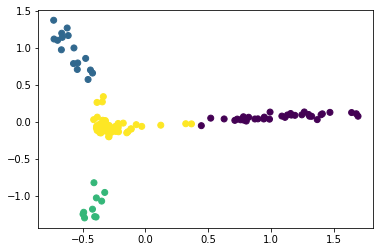

In [119]:
#cs_pca
from matplotlib import pyplot as plt
plt.scatter(cs_pca[:,0],cs_pca[:,1], c = topics)

## 正負情緒判別

In [122]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/yahoo_movie.xlsx', index_col = 0)

In [123]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [125]:
df['title'].value_counts()

最終騎士       452
奧創紀元       281
攻殼機動隊      173
最後的絕地武士    117
古墓奇兵        89
Name: title, dtype: int64

In [127]:
corpus = []
tags = []
for idx, rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  tags.append(rec.get('status'))
  corpus.append(' '.join(jieba.cut(rec.get('content'))))

In [150]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(stop_words=['奧創'])
X = vectorizer.fit_transform(corpus)

In [151]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.2, random_state = 42)

In [152]:
train_X.shape

(784, 4838)

In [153]:
test_X.shape

(196, 4838)

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [155]:
pred_y = clf.predict(test_X)

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.7653061224489796

In [157]:
confusion_matrix(test_y, pred_y)

array([[54, 27],
       [19, 96]])

In [158]:
s = '被炎柱煉獄杏壽郎圈粉了~~太感人'
s_corpus = ' '.join(jieba.cut(s))
s_vec = vectorizer.transform([s_corpus])
s_vec

<1x4838 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [159]:
clf.predict(s_vec)

array(['good'], dtype='<U4')

In [160]:
clf.classes_

array(['bad', 'good'], dtype='<U4')

In [161]:
import operator
coef_features_c1_c2 = []
for index, features in enumerate(zip(vectorizer.get_feature_names(), \
  clf.feature_count_[0], clf.feature_count_[1])):
  feat,c1,c2 = features
  coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0),reverse=True)[0:20]:
  print(i)

(6.471355816537203, '不錯', 1.2527591069184867, 14.578405749814104)
(5.031772479089554, '好看', 6.2859932698021765, 36.661460417822305)
(3.5959291521551573, '雖然', 0.7251698131544235, 6.203588423540057)
(2.9509649142280967, '不過', 0.7777079819696752, 5.245953882535746)
(2.8756406965803922, '非常', 1.2291903806201514, 6.410350578936842)
(2.8459890395662475, '刺激', 0.4969358919588743, 4.260263141448281)
(2.8271341753719694, '感動', 0.08088989691879848, 3.0558207673934206)
(2.755204565676412, '還可以', 0.9163375941464994, 5.279902088769786)
(2.733178943799121, '希望', 0.290109128666517, 3.5260991056743554)
(2.7133148222393837, '喜歡', 1.0301665906033626, 5.5084811018992985)
(2.7035519703512896, '值得', 1.055760159296236, 5.55785442923502)
(2.65676263434385, '但是', 0.7678723366638399, 4.696817166338641)
(2.6138164268968582, '有些', 0.33777782660848044, 3.4967056587276226)
(2.5169320242697095, '爽片', 1.963502571974712, 7.458934527408803)
(2.478799483580887, '其實', 0.627292613286546, 4.033732089449682)
(2.4476385982

In [162]:
import operator
coef_features_c1_c2 = []
for index, features in enumerate(zip(vectorizer.get_feature_names(), \
  clf.feature_count_[0], clf.feature_count_[1])):
  feat,c1,c2 = features
  coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0),reverse=True)[0:20]:
  print(i)

(6.075246373442776, '睡著', 12.87764125304565, 1.1196903732725543)
(4.402124212901476, '浪費', 7.204200091270568, 0.6365281266159961)
(3.9560800185269995, '爛片', 7.519442491176544, 0.9007306363778558)
(3.5639982953328024, '看到', 16.141579342338645, 3.529064832459848)
(3.1940689955980615, '睡覺', 4.860370493896847, 0.5216861315754968)
(2.931392653843438, '失望', 7.788642513095119, 1.6569768819210189)
(2.914317241597906, '演什麼', 3.5769239404349573, 0.22736258406574403)
(2.4044823263936883, '空洞', 3.5959516368653133, 0.49552009486325665)
(2.2814030250594923, '只有', 4.817653703779228, 1.1117065467437952)
(2.0807024685407303, '難看', 14.629259696772086, 6.030923410703742)
(2.073551768556302, '四集', 2.2959618244615805, 0.10726043076326473)
(2.021695889662221, '亂七八糟', 2.529498271257764, 0.25117644260551225)
(1.9721644367100868, '無聊', 4.93569271497748, 1.5026780845977905)
(1.9198916259333108, '爛透', 1.9198916259333108, 0.0)
(1.9147255861808632, '超爛', 1.9147255861808632, 0.0)
(1.816788110045233, '劇本', 2.9236313

In [163]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)
accuracy_score(test_y, pred_y)

0.8163265306122449

In [164]:
confusion_matrix(test_y, pred_y)

array([[ 56,  25],
       [ 11, 104]])

In [165]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)
accuracy_score(test_y, pred_y)

0.7908163265306123

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)
accuracy_score(test_y, pred_y)

0.7602040816326531

## https://github.com/ywchiu/tibame_tm